# Team - Dissolvable Data


## Our Project is to dissolve all the data to find a list of recommended suitable cities to have a headquarter/branch of any company based on its specific parameters.

### The Input Parameters are 

    1. Minimum Population in that city  
    2. Primary Labor Force Required - Only one from 22 Occupations  
    3. Secondry Labor Force Requried - Only one from 21 Occupations  
    4. Optional Labor Force Require - Zero or more from 20 Occupations  
    5. Weightage for Population - From Zero to 10   
    6. Weightage for Labor Force - From Zero to 10   
    7. Weightage for Proximity to Airport - from Zero to 10 - If all weightages are zero, it is automatically  
       takes as 1 

#### Dependencies Libraries 

In [1]:
# Dependencies Libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests as req
import json
import ipywidgets as widgets
from IPython.display import display, HTML
from ipywidgets import interactive, Layout, Textarea, Dropdown, Label
HTML('<style> .widget-hbox .widget-label { max-width:350ex; text-align:left} </style>')

#### Creating the list for Population and Labor Force Catagory

In [2]:
# Population Catagory Options in a list 
population_catagory = ['>=100000','>=250000','>=500000','>=1000000']

labor_force_catagory = ['Management','Business and Financial Operations','Computer and Mathematical',
                        'Architecture and Engineering','Life, Physical, and Social Science',
                        'Community and Social Service','Legal','Education, Training, and Library',
                        'Arts, Design, Entertainment, Sports, and Media','Healthcare Practitioners and Technical',
                        'Healthcare Support','Protective Service','Food Preparation and Serving Related',
                        'Building and Grounds Cleaning and Maintenance','Personal Care and Service',
                        'Sales and Related','Office and Administrative Support','Farming, Fishing, and Forestry',
                        'Construction and Extraction','Installation, Maintenance, and Repair','Production',
                        'Transportation and Material Moving']

#### Definition for the layout for the Input Selection 

In [3]:
form_item_layout = Layout(
    display='flex',
    #flex_flow='row',
    justify_content='space-between',
    flex_flow='column',
    border='solid 2px',
    align_items='stretch',
    width='70%'
)

#### Loading the Census Data to a DataFrame

In [4]:
census = pd.read_csv('Census.csv', encoding="ISO-8859-1")
census.head()

,City,Population,County,State,FullState,MSA,Population Score,Closest Airport,Proximity to Airport,Airport Score
0,New York,8537673,Bronx County,NY,New York,"New York-Jersey City-White Plains, NY-NJ Metro...",10.0,Newark Liberty International Airport,28 min,0.8
1,Los Angeles,3976322,Los Angeles County,CA,California,"Los Angeles-Long Beach-Glendale, CA Metropolit...",10.0,Los Angeles International Airport,25 min,2.0
2,Chicago,2704958,Cook County,IL,Illinois,"Chicago-Naperville-Arlington Heights, IL Metro...",10.0,O'Hare International Airport,31 min,0.0
3,Houston,2303482,Harris County,TX,Texas,"Houston-The Woodlands-Sugar Land, TX",10.0,George Bush Intercontinental Airport,21 min,3.6
4,Phoenix,1615017,Maricopa County,AZ,Arizona,"Phoenix-Mesa-Scottsdale, AZ",10.0,Phoenix Sky Harbor International Airport,9 min,8.4


#### List of Attributes in Census Data

In [5]:
census.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 10 columns):
City                    303 non-null object
Population              303 non-null int64
County                  303 non-null object
State                   303 non-null object
FullState               303 non-null object
MSA                     303 non-null object
Population Score        303 non-null float64
Closest Airport         303 non-null object
Proximity to Airport    303 non-null object
Airport Score           303 non-null float64
dtypes: float64(2), int64(1), object(7)
memory usage: 23.8+ KB


#### Loading the Labor Force Data to a DataFrame

In [6]:
laborforce = pd.read_csv('LaborForce.csv')
laborforce.head()

,AREA_NAME,OCC_TITLE,TOT_EMP,JOBS_1000,LOC QUOTIENT,Score
0,"Abilene, TX",Management,"2,030",31.741,0.63,1.3
1,"Abilene, TX",Business and Financial Operations,"2,230",34.804,0.67,1.7
2,"Abilene, TX",Computer and Mathematical,920,14.402,0.49,0.0
3,"Abilene, TX",Architecture and Engineering,710,11.068,0.62,1.2
4,"Abilene, TX","Life, Physical, and Social Science",380,5.901,0.72,2.2


#### List of Attributes in Labor Force Data

#### Define Population function to choose the population catagory as part of the Selection Widgets

In [7]:
# Define Population function to choose the population catagory as part of the Selection Widgets
def f(Population):
    if Population =='>=100000':
        Population = 100000
    elif Population == '>=250000':
        Population = 250000
    elif Population == '>=500000':
        Population = 500000
    else:
        Population = 1000000
    return Population

# Create Lists using interactive
Population = interactive(f,Population=population_catagory)
                         #,layout=form_item_layout)

# You can also view this in a notebook without using display.
display(Population)

interactive(children=(Dropdown(description='Population', options=('>=100000', '>=250000', '>=500000', '>=1000000'), value='>=100000'), Output()), _dom_classes=('widget-interact',))

#### This is to show the user selection value for the Minimum Population

In [8]:
# This is to show the user selection value for the Minimum Population 
Minimum_population = Population.result
Minimum_population

100000

#### Define Labor force Catagory function to choose the Labor force Catagory as part of the Selection Widgets

In [9]:
# Define Labor force Catagory function to choose the Labor force Catagory as part of the Selection Widgets
def f(Primary):
    return Primary
# Create Lists using interactive
primary = interactive(f,Primary=labor_force_catagory,layout=form_item_layout)

# You can also view this in a notebook without using display.
display(primary)

interactive(children=(Dropdown(description='Primary', options=('Management', 'Business and Financial Operations', 'Computer and Mathematical', 'Architecture and Engineering', 'Life, Physical, and Social Science', 'Community and Social Service', 'Legal', 'Education, Training, and Library', 'Arts, Design, Entertainment, Sports, and Media', 'Healthcare Practitioners and Technical', 'Healthcare Support', 'Protective Service', 'Food Preparation and Serving Related', 'Building and Grounds Cleaning and Maintenance', 'Personal Care and Service', 'Sales and Related', 'Office and Administrative Support', 'Farming, Fishing, and Forestry', 'Construction and Extraction', 'Installation, Maintenance, and Repair', 'Production', 'Transportation and Material Moving'), value='Management'), Output()), _dom_classes=('widget-interact',))

#### This is to show the user selection value for the Primary Labor Force

In [10]:
Primary = primary.result
Primary

'Management'

#### This is to have an option for the user to choose the Secondary Labor Force form the list of values other then Primary

In [11]:
Secondary_labor_force_catagory = [x for x in labor_force_catagory if x != Primary]

In [12]:
# Define Labor force Catagory function to choose the Labor force Catagory as part of the Selection Widgets
def f(Secondary):
    return Secondary
# Create Lists using interactive
secondary = interactive(f,Secondary=Secondary_labor_force_catagory,layout=form_item_layout)

# You can also view this in a notebook without using display.
display(secondary)

interactive(children=(Dropdown(description='Secondary', options=('Business and Financial Operations', 'Computer and Mathematical', 'Architecture and Engineering', 'Life, Physical, and Social Science', 'Community and Social Service', 'Legal', 'Education, Training, and Library', 'Arts, Design, Entertainment, Sports, and Media', 'Healthcare Practitioners and Technical', 'Healthcare Support', 'Protective Service', 'Food Preparation and Serving Related', 'Building and Grounds Cleaning and Maintenance', 'Personal Care and Service', 'Sales and Related', 'Office and Administrative Support', 'Farming, Fishing, and Forestry', 'Construction and Extraction', 'Installation, Maintenance, and Repair', 'Production', 'Transportation and Material Moving'), value='Business and Financial Operations'), Output()), _dom_classes=('widget-interact',))

#### This is to show the user selection value for the Secondary Labor Force

In [13]:
Secondary = secondary.result
Secondary

'Business and Financial Operations'

#### This is to have an option for the user to choose the Optional Labor Force form the list of values other then Primary and Secondary

In [14]:
optional_labor_force_catagory = [x for x in Secondary_labor_force_catagory if x != secondary.result]

In [15]:
optional = widgets.SelectMultiple(
    options=optional_labor_force_catagory,
    #value=['Oranges'],
    layout=form_item_layout,
    rows=20,
    description='Optional',
    disabled=False
)
display(optional)

SelectMultiple(description='Optional', layout=Layout(align_items='stretch', border='solid 2px', display='flex', flex_flow='column', justify_content='space-between', width='70%'), options=('Computer and Mathematical', 'Architecture and Engineering', 'Life, Physical, and Social Science', 'Community and Social Service', 'Legal', 'Education, Training, and Library', 'Arts, Design, Entertainment, Sports, and Media', 'Healthcare Practitioners and Technical', 'Healthcare Support', 'Protective Service', 'Food Preparation and Serving Related', 'Building and Grounds Cleaning and Maintenance', 'Personal Care and Service', 'Sales and Related', 'Office and Administrative Support', 'Farming, Fishing, and Forestry', 'Construction and Extraction', 'Installation, Maintenance, and Repair', 'Production', 'Transportation and Material Moving'), rows=20, value=())

#### This is to show the user selection value for the Optional Labor Force

In [16]:
optional.value

()

#### Define Population function to choose the Weigtage for the Population

In [17]:
style = {'description_width': 'initial'}
Pop_weight = widgets.IntSlider(
    value=1,
    min=0,
    max=10,
    step=1,
    description='Population Weight',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d',
    style=style
)

display(Pop_weight)

IntSlider(value=1, continuous_update=False, description='Population Weight', max=10, style=SliderStyle(description_width='initial'))

#### This is to show the user selection value for the Population Weightage

In [18]:
Pop_weight.value

1

#### Define Population function to choose the Weightage for the Labor Force

In [19]:
style = {'description_width': 'initial'}
Labor_weight = widgets.IntSlider(
    value=1,
    min=0,
    max=10,
    step=1,
    description='Labor Force Weight',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d',
    style=style
)

display(Labor_weight)

IntSlider(value=1, continuous_update=False, description='Labor Force Weight', max=10, style=SliderStyle(description_width='initial'))

#### This is to show the user selection value for the Labor Force Weightage

In [20]:
Labor_weight.value

1

#### Define Population function to choose the Weightage for the Proximity to Airport

In [21]:
style = {'description_width': 'initial'}
if (Labor_weight.value == 0 and Pop_weight.value == 0):
    Airport_weight = widgets.IntSlider(
        value=1,
        min=1,
        max=10,
        step=1,
        description='Proximity to Airport Weight',
        disabled=False,
        continuous_update=False,
        orientation='horizontal',
        readout=True,
        readout_format='d',
        style=style
    )
else:
    Airport_weight = widgets.IntSlider(
        value=1,
        min=0,
        max=10,
        step=1,
        description='Proximity to Airport Weight',
        disabled=False,
        continuous_update=False,
        orientation='horizontal',
        readout=True,
        readout_format='d',
        style=style
    )


display(Airport_weight)

IntSlider(value=1, continuous_update=False, description='Proximity to Airport Weight', max=10, style=SliderStyle(description_width='initial'))

#### This is to show the user selection value for the Proximity to Airport Weightage

In [22]:
Airport_weight.value

1

#### Details of the selected inputs by the user

In [23]:
User_input_details = {
                    'Population':Population.result,
                    'Primary':primary.result,
                    'Secondary':secondary.result,
                    'Optional':optional.value,
                    'Population Weight':Pop_weight.value,
                    'Labor Force Weight':Labor_weight.value,
                    'Airport Proximity Weight':Airport_weight.value
                    }
User_input_details

{'Airport Proximity Weight': 1,
 'Labor Force Weight': 1,
 'Optional': (),
 'Population': 100000,
 'Population Weight': 1,
 'Primary': 'Management',
 'Secondary': 'Business and Financial Operations'}

#### This to Select the Census Data based on the Minimum Population

In [24]:
census = census[(census["Population"] >= Minimum_population)]
census["Primary Occupation"] = ""
census["Secondary Occupation"] = ""
census["Additional Occupations"] = ""
census.head()

,City,Population,County,State,FullState,MSA,Population Score,Closest Airport,Proximity to Airport,Airport Score,Primary Occupation,Secondary Occupation,Additional Occupations
0,New York,8537673,Bronx County,NY,New York,"New York-Jersey City-White Plains, NY-NJ Metro...",10.0,Newark Liberty International Airport,28 min,0.8,,,
1,Los Angeles,3976322,Los Angeles County,CA,California,"Los Angeles-Long Beach-Glendale, CA Metropolit...",10.0,Los Angeles International Airport,25 min,2.0,,,
2,Chicago,2704958,Cook County,IL,Illinois,"Chicago-Naperville-Arlington Heights, IL Metro...",10.0,O'Hare International Airport,31 min,0.0,,,
3,Houston,2303482,Harris County,TX,Texas,"Houston-The Woodlands-Sugar Land, TX",10.0,George Bush Intercontinental Airport,21 min,3.6,,,
4,Phoenix,1615017,Maricopa County,AZ,Arizona,"Phoenix-Mesa-Scottsdale, AZ",10.0,Phoenix Sky Harbor International Airport,9 min,8.4,,,


#### Calculate the Primary Labor Force Scores and update the Census Data

In [25]:
for index2, row in census.iterrows():
    MSA = row["MSA"]
    Scores = []
    
    for index, row in laborforce.iterrows():
        if row["AREA_NAME"] == MSA and row["OCC_TITLE"] == Primary:
            Scores.append(row["Score"])
    
    census.set_value(index2, "Primary Occupation", round(Scores[0],1))
    
census.head()

,City,Population,County,State,FullState,MSA,Population Score,Closest Airport,Proximity to Airport,Airport Score,Primary Occupation,Secondary Occupation,Additional Occupations
0,New York,8537673,Bronx County,NY,New York,"New York-Jersey City-White Plains, NY-NJ Metro...",10.0,Newark Liberty International Airport,28 min,0.8,6.2,,
1,Los Angeles,3976322,Los Angeles County,CA,California,"Los Angeles-Long Beach-Glendale, CA Metropolit...",10.0,Los Angeles International Airport,25 min,2.0,5.8,,
2,Chicago,2704958,Cook County,IL,Illinois,"Chicago-Naperville-Arlington Heights, IL Metro...",10.0,O'Hare International Airport,31 min,0.0,10,,
3,Houston,2303482,Harris County,TX,Texas,"Houston-The Woodlands-Sugar Land, TX",10.0,George Bush Intercontinental Airport,21 min,3.6,3.6,,
4,Phoenix,1615017,Maricopa County,AZ,Arizona,"Phoenix-Mesa-Scottsdale, AZ",10.0,Phoenix Sky Harbor International Airport,9 min,8.4,6.4,,


#### Calculate the Secondary Labor Force Scores and update the Census Data

In [26]:
for index4, row in census.iterrows():
    MSA = row["MSA"]
    Scores = []
    
    for index, row in laborforce.iterrows():
        if row["AREA_NAME"] == MSA and row["OCC_TITLE"] == Secondary:
            Scores.append(row["Score"])

    census.set_value(index4, "Secondary Occupation", round(Scores[0],1))
    
census.head()

,City,Population,County,State,FullState,MSA,Population Score,Closest Airport,Proximity to Airport,Airport Score,Primary Occupation,Secondary Occupation,Additional Occupations
0,New York,8537673,Bronx County,NY,New York,"New York-Jersey City-White Plains, NY-NJ Metro...",10.0,Newark Liberty International Airport,28 min,0.8,6.2,8,
1,Los Angeles,3976322,Los Angeles County,CA,California,"Los Angeles-Long Beach-Glendale, CA Metropolit...",10.0,Los Angeles International Airport,25 min,2.0,5.8,6.1,
2,Chicago,2704958,Cook County,IL,Illinois,"Chicago-Naperville-Arlington Heights, IL Metro...",10.0,O'Hare International Airport,31 min,0.0,10,6.8,
3,Houston,2303482,Harris County,TX,Texas,"Houston-The Woodlands-Sugar Land, TX",10.0,George Bush Intercontinental Airport,21 min,3.6,3.6,5.2,
4,Phoenix,1615017,Maricopa County,AZ,Arizona,"Phoenix-Mesa-Scottsdale, AZ",10.0,Phoenix Sky Harbor International Airport,9 min,8.4,6.4,5.8,


#### Calculate the Optional Labor Force(s) Scores and update the Census Data

In [27]:
Optional = list(optional.value)
total_optional = len(Optional)
if total_optional != 0:
    for index6, row in census.iterrows():
        MSA = row["MSA"]
        optional_value = 0
        avg_optional = 0

        for index, row in laborforce.iterrows():
            for occupation in Optional:
                if row["AREA_NAME"] == MSA and row["OCC_TITLE"] == occupation:
                    optional_value += row["Score"]

        avg_optional = optional_value / total_optional

        census.set_value(index6, "Additional Occupations", round(avg_optional,1))
    
census.head()

,City,Population,County,State,FullState,MSA,Population Score,Closest Airport,Proximity to Airport,Airport Score,Primary Occupation,Secondary Occupation,Additional Occupations
0,New York,8537673,Bronx County,NY,New York,"New York-Jersey City-White Plains, NY-NJ Metro...",10.0,Newark Liberty International Airport,28 min,0.8,6.2,8,
1,Los Angeles,3976322,Los Angeles County,CA,California,"Los Angeles-Long Beach-Glendale, CA Metropolit...",10.0,Los Angeles International Airport,25 min,2.0,5.8,6.1,
2,Chicago,2704958,Cook County,IL,Illinois,"Chicago-Naperville-Arlington Heights, IL Metro...",10.0,O'Hare International Airport,31 min,0.0,10,6.8,
3,Houston,2303482,Harris County,TX,Texas,"Houston-The Woodlands-Sugar Land, TX",10.0,George Bush Intercontinental Airport,21 min,3.6,3.6,5.2,
4,Phoenix,1615017,Maricopa County,AZ,Arizona,"Phoenix-Mesa-Scottsdale, AZ",10.0,Phoenix Sky Harbor International Airport,9 min,8.4,6.4,5.8,


#### Calculate the Final Labor Force Scores and update the Census Data

In [28]:
if total_optional != 0:
    census["Labor Force Score"] = (5 * census["Primary Occupation"] + 3 * census["Secondary Occupation"] + 2 * census["Additional Occupations"]) / 10
else:
    census["Labor Force Score"] = (5 * census["Primary Occupation"] + 3 * census["Secondary Occupation"]) / 8

census.head()

,City,Population,County,State,FullState,MSA,Population Score,Closest Airport,Proximity to Airport,Airport Score,Primary Occupation,Secondary Occupation,Additional Occupations,Labor Force Score
0,New York,8537673,Bronx County,NY,New York,"New York-Jersey City-White Plains, NY-NJ Metro...",10.0,Newark Liberty International Airport,28 min,0.8,6.2,8,,6.875
1,Los Angeles,3976322,Los Angeles County,CA,California,"Los Angeles-Long Beach-Glendale, CA Metropolit...",10.0,Los Angeles International Airport,25 min,2.0,5.8,6.1,,5.9125
2,Chicago,2704958,Cook County,IL,Illinois,"Chicago-Naperville-Arlington Heights, IL Metro...",10.0,O'Hare International Airport,31 min,0.0,10,6.8,,8.8
3,Houston,2303482,Harris County,TX,Texas,"Houston-The Woodlands-Sugar Land, TX",10.0,George Bush Intercontinental Airport,21 min,3.6,3.6,5.2,,4.2
4,Phoenix,1615017,Maricopa County,AZ,Arizona,"Phoenix-Mesa-Scottsdale, AZ",10.0,Phoenix Sky Harbor International Airport,9 min,8.4,6.4,5.8,,6.175


#### Adding the City with State Details in Census Data

In [29]:
census["City, State"] = (census["City"] + ", " + census["FullState"])
#census.head()

#### Calculate the Overall Scores and update the Census Data

In [30]:
census["Overall Score"] = (Pop_weight.value * census["Population Score"] + Labor_weight.value * census["Labor Force Score"] + Airport_weight.value * census["Airport Score"]) / (Pop_weight.value + Labor_weight.value + Airport_weight.value) * 10
census["Overall Score"] = census["Overall Score"].map("{:,.1f}".format)
census.head()

,City,Population,County,State,FullState,MSA,Population Score,Closest Airport,Proximity to Airport,Airport Score,Primary Occupation,Secondary Occupation,Additional Occupations,Labor Force Score,"City, State",Overall Score
0,New York,8537673,Bronx County,NY,New York,"New York-Jersey City-White Plains, NY-NJ Metro...",10.0,Newark Liberty International Airport,28 min,0.8,6.2,8,,6.875,"New York, New York",58.9
1,Los Angeles,3976322,Los Angeles County,CA,California,"Los Angeles-Long Beach-Glendale, CA Metropolit...",10.0,Los Angeles International Airport,25 min,2.0,5.8,6.1,,5.9125,"Los Angeles, California",59.7
2,Chicago,2704958,Cook County,IL,Illinois,"Chicago-Naperville-Arlington Heights, IL Metro...",10.0,O'Hare International Airport,31 min,0.0,10,6.8,,8.8,"Chicago, Illinois",62.7
3,Houston,2303482,Harris County,TX,Texas,"Houston-The Woodlands-Sugar Land, TX",10.0,George Bush Intercontinental Airport,21 min,3.6,3.6,5.2,,4.2,"Houston, Texas",59.3
4,Phoenix,1615017,Maricopa County,AZ,Arizona,"Phoenix-Mesa-Scottsdale, AZ",10.0,Phoenix Sky Harbor International Airport,9 min,8.4,6.4,5.8,,6.175,"Phoenix, Arizona",81.9


#### Show the Final List of Cities based on the Input Selection

In [31]:
result = census[["City, State", "Population Score", "Labor Force Score", "Airport Score", "Overall Score"]]
result = result.sort_values('Overall Score', ascending=False)
result.index = np.arange(1, len(result) + 1)
result = result.iloc[:10]
result

,"City, State",Population Score,Labor Force Score,Airport Score,Overall Score
1,"Lakeland, Florida",1.0,1.7125,0.0,9.0
2,"Boston, Massachusetts",6.6,9.6625,9.2,84.9
3,"Phoenix, Arizona",10.0,6.175,8.4,81.9
4,"San Diego, California",10.0,6.625,7.6,80.8
5,"Visalia, California",1.3,1.25,0.0,8.5
6,"Columbus, Ohio",8.4,5.725,7.6,72.4
7,"Philadelphia, Pennsylvania",10.0,4.9375,5.6,68.5
8,"Oakland, California",4.1,10,6.4,68.3
9,"Nashville-Davidson County, Tennessee",6.4,6.7875,7.2,68.0
10,"Seattle, Washington",6.9,7.8125,5.6,67.7


#### Create series for plotting

In [32]:
cities = result.iloc[:,0]
pop_scores = result.iloc[:,1]
labor_scores = result.iloc[:,2]
air_scores = result.iloc[:,3]
overall_scores = result.iloc[:,4]

overall_scores.head()

1     9.0
2    84.9
3    81.9
4    80.8
5     8.5
Name: Overall Score, dtype: object

#### Plot Top Cities

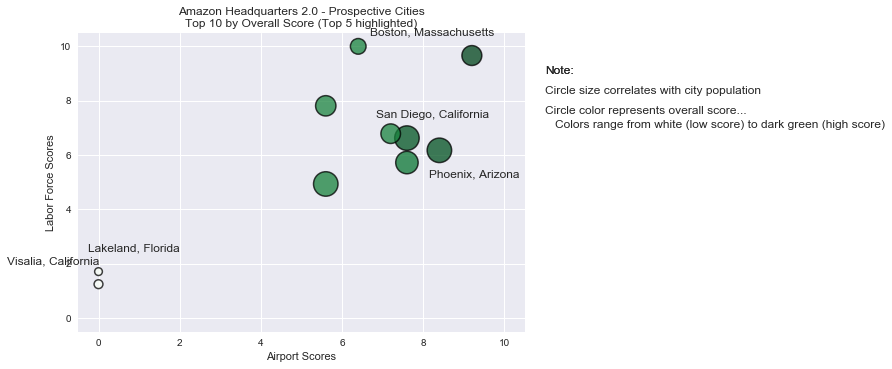

In [33]:
# Initialize plot + format the scatters
fig, ax = plt.subplots()
ax.scatter(air_scores, labor_scores, pop_scores*60, alpha=0.75, c=overall_scores, cmap=plt.cm.Greens, edgecolors="black", linewidths=1.5, label="Urban")

# Format and print the full plot
plt.title("Amazon Headquarters 2.0 - Prospective Cities\nTop 10 by Overall Score (Top 5 highlighted)")
plt.ylabel("Labor Force Scores")
plt.xlabel("Airport Scores")
plt.annotate("Note:", xy=(0,0), xytext=(11,9))
plt.annotate("Note:", xy=(0,0), xytext=(11,9))
plt.annotate("Circle size correlates with city population", xy=(0,0), xytext=(11,8.25))
plt.annotate("Circle color represents overall score...", xy=(0,0), xytext=(11,7.5))
plt.annotate("Colors range from white (low score) to dark green (high score)", xy=(0,0), xytext=(11.25,7))

plt.annotate(result.iloc[0,0], xy=(result.iloc[0,3], result.iloc[0,2]), xytext=(result.iloc[0,3]-0.25, result.iloc[0,2]+0.75))
plt.annotate(result.iloc[1,0], xy=(result.iloc[1,3], result.iloc[1,2]), xytext=(result.iloc[1,3]-2.5, result.iloc[1,2]+0.75))
plt.annotate(result.iloc[2,0], xy=(result.iloc[2,3], result.iloc[2,2]), xytext=(result.iloc[2,3]-0.25, result.iloc[2,2]-1))
plt.annotate(result.iloc[3,0], xy=(result.iloc[3,3], result.iloc[3,2]), xytext=(result.iloc[3,3]-0.75, result.iloc[3,2]+0.75))
plt.annotate(result.iloc[4,0], xy=(result.iloc[4,3], result.iloc[4,2]), xytext=(result.iloc[4,3]-2.25, result.iloc[4,2]+0.75))

plt.xlim(-.5,10.5)
plt.ylim(-.5,10.5)
plt.show()